In [1]:
library(ggplot2)
library(dplyr)
library(ggrepel)
library(purrr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Ath_TF_list <- read.csv('./scan_motif/Ath_TF_list.txt', sep = '\t') %>% select(Gene_ID, Family) %>% distinct

In [3]:
Ath_TF_list_duplicated <- Ath_TF_list %>% filter( Gene_ID %in% 
        (Ath_TF_list %>% group_by(Gene_ID) %>% summarize(n = n()) %>% arrange(desc(n)) %>% filter(n > 1)  %>% pull(Gene_ID))
                       ) %>% arrange(Gene_ID)

In [4]:
Ath_TF_list <- Ath_TF_list %>% filter( ! Gene_ID %in% Ath_TF_list_duplicated$Gene_ID)  %>% rbind(Ath_TF_list_duplicated %>% filter(!Family %in% c('MYB_related', 'CO-like', 'AP2')))

In [5]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [6]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
ATCG00250,TRNE
AT1G10950,TMN1


In [7]:
diffTF_result <- read.csv(
    '/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.summary.tsv',
    sep = '\t') %>% arrange(pvalueAdj) %>% left_join(map_id_name, by = c('TF' = 'gene_id'))

In [8]:
#COLvsDM means COL is base

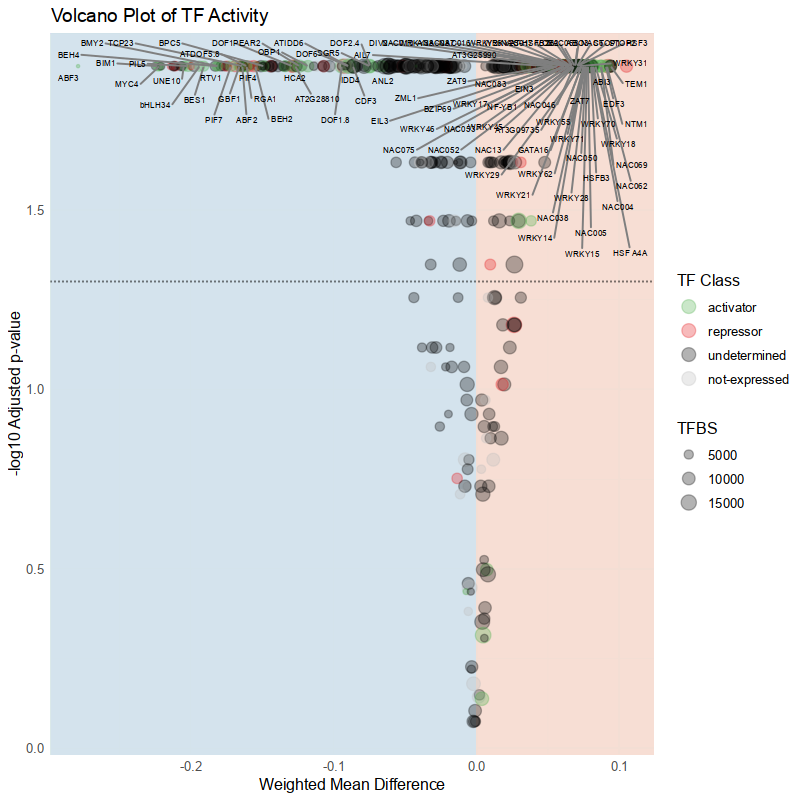

In [9]:
library(ggplot2)
library(dplyr)
library(ggrepel)
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
# Assuming 'df' is your dataframe name and it's already loaded in your environment
# Update the variable names and factors based on your specific dataframe

# Transforming p-values to a log scale for the plot and adding classifications
diffTF_result <- diffTF_result %>%
  mutate(
    pValueAdj_log10 = -log10(pvalueAdj + 1e-10), # Adjusting p-values
    significant = pvalueAdj < 0.05, # Define your significance level here
    TF_class = factor(classification_q0.001_final, levels = c("activator", "repressor", "undetermined", "not-expressed")), # Use the correct column name
    rank_pValueAdj_log10 = rank(-pValueAdj_log10) # Add this line to rank p-values
  )
# df
# Define the colors for the different classes
color_categories <- c("activator" = "#4daf4a", "repressor" = "#e41a1c", "undetermined" = "black", "not-expressed" = "grey")

# Plot with background color for weighted mean difference
plot <- ggplot(diffTF_result, aes(x = weighted_meanDifference, y = pValueAdj_log10)) +
  geom_rect(xmin = -Inf, xmax = 0, ymin = -Inf, ymax = Inf, fill = "#D6E5EF", alpha = 0.2) +  # Blue background for COL
  geom_rect(xmin = 0, xmax = Inf, ymin = -Inf, ymax = Inf, fill = "#F6DDD2", alpha = 0.2) +  # Red background for DM
  geom_point(aes(color = TF_class, size = TFBS), alpha = 0.3) +

  scale_color_manual(values = color_categories) +
  scale_size_continuous(name = "TFBS", range = c(0.1, 5)) +
  geom_hline(yintercept = -log10(0.05), linetype = "dotted") +  # Significance threshold line
  theme_minimal() +
  labs(title = 'Volcano Plot of TF Activity', x = 'Weighted Mean Difference', y = '-log10 Adjusted p-value') +
  theme(legend.position = "right") +
  guides(color = guide_legend(title = "TF Class", override.aes = list(size = 4)),
         size = guide_legend(title = "TFBS"))

plot <- plot +
  geom_text_repel(
    aes(label = ifelse(TF_class == "activator" & rank_pValueAdj_log10 <= 400 &
                    weighted_meanDifference %>% abs() > 0.05, 
                       as.character(gene_name), "")),
    size = 2,  # Adjust text size as needed
    max.overlaps = Inf,  # Allow for an infinite number of overlaps
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0, "lines"),
    segment.color = 'grey50'
  )


plot
# Save the plot if needed
# ggsave("improved_volcano_plot.pdf", width = 10, height = 8, dpi = 300)


In [10]:
diffTF_result %>% names

[1] "TF"                          "weighted_meanDifference"    
 [3] "weighted_CD"                 "TFBS"                       
 [5] "weighted_Tstat"              "variance"                   
 [7] "pvalue"                      "Cohend_factor"              
 [9] "pvalueAdj"                   "median.cor.tfs"             
[11] "classification_q0.1"         "classification_q0.05"       
[13] "classification_q0.01"        "classification_q0.001"      
[15] "classification_distr_rawP"   "classification_q0.1_final"  
[17] "classification_q0.05_final"  "classification_q0.01_final" 
[19] "classification_q0.001_final" "gene_name"                  
[21] "pValueAdj_log10"             "significant"                
[23] "TF_class"                    "rank_pValueAdj_log10"

In [11]:
diffTF_result_simplified <- diffTF_result %>% select( TF, TF_class, weighted_meanDifference, TFBS, pvalueAdj) %>% 
    filter(pvalueAdj < 0.05)
diffTF_result_simplified

TF,TF_class,weighted_meanDifference,TFBS,pvalueAdj
<chr>,<fct>,<dbl>,<int>,<dbl>
AT1G01250,undetermined,-0.02740,6948,0.01256585
AT1G01260,undetermined,-0.20600,4338,0.01256585
AT1G01720,undetermined,0.03200,5237,0.01256585
AT1G02230,activator,0.08120,8667,0.01256585
AT1G02250,activator,0.07810,10067,0.01256585
AT1G03800,undetermined,-0.03250,10741,0.01256585
AT1G03840,undetermined,-0.05000,15463,0.01256585
AT1G06070,activator,0.06120,4843,0.01256585
AT1G06850,undetermined,0.03870,4813,0.01256585


In [12]:
library(stringr)

In [13]:
# Define the path to the directory containing the subdirectories
base_path <- './WGCNA_ATAC_integration/ame_results_with_shuffle/'
# base_path <- './WGCNA_ATAC_integration/ame_results_with_control/'

# List all subdirectories in the base_path
sub_dirs <- list.dirs(path = base_path, full.names = TRUE, recursive = FALSE)

read_and_prepare <- function(dir_path) {
  file_path <- file.path(dir_path, 'ame.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols()) 
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Check if the 'rank' column exists
      if ("rank" %in% names(data)) {
        # Proceed with filtering and mutating
        data <- data %>% 
          filter(str_detect(rank, '^\\d')) %>% 
          mutate(module = basename(dir_path))
        return(data)
      } else {
        # If 'rank' column doesn't exist, return a message or handle accordingly
        warning(paste("The 'rank' column does not exist in the file:", file_path))
        return(tibble())
      }
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}


# Apply the function to each subdirectory and combine the results
ame_result <- map_dfr(sub_dirs, read_and_prepare) %>% mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_') %>% str_remove('.meme'))
# ame_result
# combined_data now contains all the data combined from each subdirectory
ame_result <- ame_result %>% left_join(map_id_name, by = c('motif_ID' = 'gene_id')) %>%
    mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_')) %>%
    arrange(`adj_p-value`) %>% select(motif_ID, motif_alt_ID, consensus, `adj_p-value`, module ) %>% 
    dplyr::rename( 'enriched_module' = module) 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

In [14]:
read_and_prepare_sequences <- function(dir_path) {
  file_path <- file.path(dir_path, 'sequences.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols())
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Perform any required filtering and mutation
      # For example, you might want to mutate the motif_DB column as you did before
      data <- data %>% 
        mutate(motif_DB = str_remove(motif_DB, '/data/scan_motif/Ath_TF_binding_motifs_'),
               enriched_module = basename(dir_path))
      return(data)
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}

# Apply the function to each subdirectory and combine the results
sequences_result <- map_dfr(sub_dirs, read_and_prepare_sequences)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

In [15]:
sequences_result

motif_DB,motif_ID,motif_ALT_ID,seq_ID,FASTA_score,PWM_score,class,enriched_module
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
plantTFDB.meme,AT1G01060,MP00119,AT5G06690WCRKC1_5_2061850_2062138,3123,123.4030,tp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT1G65470FAS1_1_24326739_24326887_shuf_1,5826,123.3640,fp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT1G22740RABG3B_1_8048952_8049085_shuf_1,4536,114.4890,fp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT1G18265AT1G18265_1_6288237_6288401,2323,112.9000,tp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT1G17200CASPL2A1_1_5877307_5877507,1888,89.9533,tp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT4G04330RbcX1_4_2118516_2118720,3064,87.9421,tp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT1G54820AT1G54820_1_20446638_20446845_shuf_1,3263,86.7893,fp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT3G52840BGAL2_3_19580951_19581178_shuf_1,3918,78.9080,fp,MEblue
plantTFDB.meme,AT1G01060,MP00119,AT4G14740FL3_4_8456170_8456412,330,77.3466,tp,MEblue


In [16]:
sequences_result <- sequences_result %>% mutate(TF_traget = seq_ID %>% str_extract('^AT\\dG\\d{5}')) %>% 
    filter(motif_ID != 'NA', class == 'tp') %>% 
    group_by(motif_ID,  enriched_module) %>% summarise(TFBS = n()) %>% 
    ungroup() %>% as.data.frame() %>% rename(TF = motif_ID)
sequences_result

`summarise()` has grouped output by 'motif_ID'. You can override using the
`.groups` argument.


TF,enriched_module,TFBS
<chr>,<chr>,<int>
AT1G01060,MEblue,272
AT1G01060,MEcyan,257
AT1G01060,MEdarkgreen,24
AT1G01060,MEtan,46
AT1G01250,MEblue,437
AT1G01250,MEcyan,327
AT1G01250,MEpurple,44
AT1G01260,MEblue,599
AT1G01260,MEcyan,497


In [17]:
diffTF_AME_WGCNA_modules <- diffTF_result_simplified %>% left_join(ame_result, by = c('TF' = 'motif_ID')) %>% 
    left_join(map_id_name, by = c('TF' = 'gene_id')) %>%  filter(!is.na(enriched_module)) %>% select(-TFBS) %>% 
    left_join(sequences_result, by = c('TF' = 'TF', 'enriched_module' = 'enriched_module')) %>% 
    left_join(Ath_TF_list %>% select(Gene_ID, Family), by = c('TF' = 'Gene_ID'))
diffTF_AME_WGCNA_modules 

TF,TF_class,weighted_meanDifference,pvalueAdj,motif_alt_ID,consensus,adj_p-value,enriched_module,gene_name,TFBS,Family
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.06e-34,MEblue,AT1G01250,437,ERF
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.09e-20,MEcyan,AT1G01250,327,ERF
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,9.89e-08,MEpurple,AT1G01250,44,ERF
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,6.16e-54,MEblue,JAM2,599,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,1.33e-31,MEcyan,JAM2,497,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,3.97e-14,MEpurple,JAM2,85,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,3.53e-08,MEdarkgreen,JAM2,33,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,3.55e-06,MEdarkred,JAM2,30,bHLH
AT1G01720,undetermined,0.0320,0.01256585,MP00121,KACGTRWNNNAHWYGNHWWCYD,1.90e-16,MEcyan,ATAF1,624,NAC


In [18]:
Res_DM1_DM2d <- readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds') %>% filter(contrast %>% str_detect('DM1/DM2d')) %>% select(AGI, log2FoldChange)

In [19]:
diffTF_AME_WGCNA_modules_L2fold <- diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% 
    filter(abs(log2FoldChange) > 2) %>% rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)
diffTF_AME_WGCNA_modules_L2fold

TF,TF_class,weighted_meanDifference,pvalueAdj,motif_alt_ID,consensus,adj_p-value,enriched_module,gene_name,TFBS,Family,log2FoldChange_DM1_2d_vs_Col_14
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.06e-34,MEblue,AT1G01250,437,ERF,-2.257223
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.09e-20,MEcyan,AT1G01250,327,ERF,-2.257223
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,9.89e-08,MEpurple,AT1G01250,44,ERF,-2.257223
AT1G02230,activator,0.0812,0.01256585,MP00122,CTTVTTYHRYAAGT,3.37e-08,MEcyan,NAC004,241,NAC,5.802775
AT1G02250,activator,0.0781,0.01256585,MP00123,TWRCTTVTTYHAYAAGTTW,3.85e-09,MEcyan,NAC005,273,NAC,6.236384
AT1G02250,activator,0.0781,0.01256585,MP00123,TWRCTTVTTYHAYAAGTTW,1.69e-04,MEblue,NAC005,64,NAC,6.236384
AT1G08320,activator,0.0185,0.01256585,MP00131,GMTGACGTCAY,5.34e-06,MEcyan,TGA9,170,bZIP,5.438124
AT1G08320,activator,0.0185,0.01256585,MP00131,GMTGACGTCAY,1.55e-04,MEtan,TGA9,12,bZIP,5.438124
AT1G12260,repressor,0.0682,0.01256585,MP00136,CKTRAAWHWYAMGCA,5.78e-08,MEcyan,NAC007,414,NAC,-3.704851


In [20]:
library(openxlsx)
library(dplyr)

# Define your color categories for the 'TF_class' column
color_categories <- c(
  "activator" = "#4daf4a", 
  "repressor" = "#d15859", 
  "undetermined" = "#95B2DE", 
  "not-expressed" = "grey"
)

# Create a new workbook
wb <- createWorkbook()

# Define the color mapping for the sheet tabs based on the module names
tab_colors <- c(
  "MEblue" = "#0000FF",
  "MEcyan" = "#00FFFF",
  "MEpurple" = "#800080",
  "MEtan" = "#D2B48C",
  "MEdarkgreen" = "#006400",
  "MEdarkred" = "#8B0000",
  "MEmidnightblue" = "#191970",
  "MEgreenyellow" = "#ADFF2F",
  "MEsalmon" = "#FA8072",
  "MEdarkturquoise" = "#00CED1"
)

df_to_write = diffTF_AME_WGCNA_modules_L2fold
# Loop through unique modules
for (i in unique(df_to_write$enriched_module)) {
    print(paste("Processing module:", i))
    # Add a worksheet for each module
    sheet_name <- i # Keep the 'ME' in the sheet name
    tab_color <- tab_colors[[sheet_name]] # Get the tab color for this module
    
    addWorksheet(wb, sheetName = sheet_name, tabColour = tab_color)
    
    # Get the data for the current module and arrange it
    module_data <- df_to_write %>% 
      filter(enriched_module == i) %>% 
      arrange(`adj_p-value`) 
    
    # Write the data to the worksheet
    writeData(wb, sheet_name, module_data)
    
    # Get the number of rows of data to determine where to apply styles
    num_rows <- nrow(module_data)
    
    # Apply styles to 'TF_class' column based on the color_categories
    if ("TF_class" %in% names(module_data)) {
      tf_class_col <- which(names(module_data) == "TF_class")
      for (row in 1:num_rows) {
        tf_class_value <- module_data[[row, "TF_class"]]
        if (!is.na(tf_class_value) && tf_class_value %in% names(color_categories)) {
          cell_style <- createStyle(fgFill = color_categories[tf_class_value])
          addStyle(wb, sheet = sheet_name, style = cell_style, rows = row + 1, cols = tf_class_col, gridExpand = TRUE)
        }
      }
    }
}

# Save the workbook
saveWorkbook(wb, file = "diffbind_results_2DM/motifs_and_classification2.xlsx", overwrite = TRUE)
diffTF_AME_WGCNA_modules_L2fold %>% write.csv('diffbind_results_2DM/diffTF_AME_WGCNA_modules_L2fold.csv')

[1] "Processing module: MEblue"
[1] "Processing module: MEcyan"
[1] "Processing module: MEpurple"
[1] "Processing module: MEtan"
[1] "Processing module: MEdarkturquoise"
[1] "Processing module: MEdarkgreen"
[1] "Processing module: MEmidnightblue"
[1] "Processing module: MEgreenyellow"
[1] "Processing module: MEdarkred"
[1] "Processing module: MEsalmon"


### Write out csv for Cytoscape

In [21]:
# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct
nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
# nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs_abs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>% select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 
edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
edges %>% sample_n(2)


[1] 173

ID,gene_name,TF_class,Family,pvalueAdj,consensus,log2FoldChange_DM1_2d_vs_Col_14,group,subgroup
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
AT5G13080,WRKY75,undetermined,WRKY,0.01256585,AAAAGTCAACGNH,7.134244,TF,WRKY
AT4G23550,WRKY29,activator,WRKY,0.01256585,AAAAGTCAACK,2.591101,TF,WRKY


source,target,interaction,weight
<chr>,<chr>,<fct>,<int>
AT1G79180,MEpurple,activator,38
AT1G29160,MEpurple,repressor,121


### import ChromVar data3

In [22]:
library(reshape2)
library(corrplot)

corrplot 0.92 loaded



In [24]:
Cor_matrix_all<- readRDS("./ChromVAR/Rdata/Cor_matrix_all.rds")
Synergy_matrix_all <- readRDS("./ChromVAR/Rdata/Synergy_matrix_all.rds")

In [25]:
# Create a named vector for mapping
name_mapping <- setNames(map_id_name$gene_name, map_id_name$gene_id)
# name_mapping

In [26]:
nodes_top2_each_Family <- nodes %>% filter(log2FoldChange_DM1_2d_vs_Col_14 > 3) %>% filter(ID %>% str_detect('^AT') )%>% group_by(Family) %>% 
    arrange(desc(log2FoldChange_DM1_2d_vs_Col_14)) %>% top_n(2, log2FoldChange_DM1_2d_vs_Col_14) %>% 
    arrange(Family)

In [27]:
Cor_test <- Cor_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
Syn_test <- Synergy_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

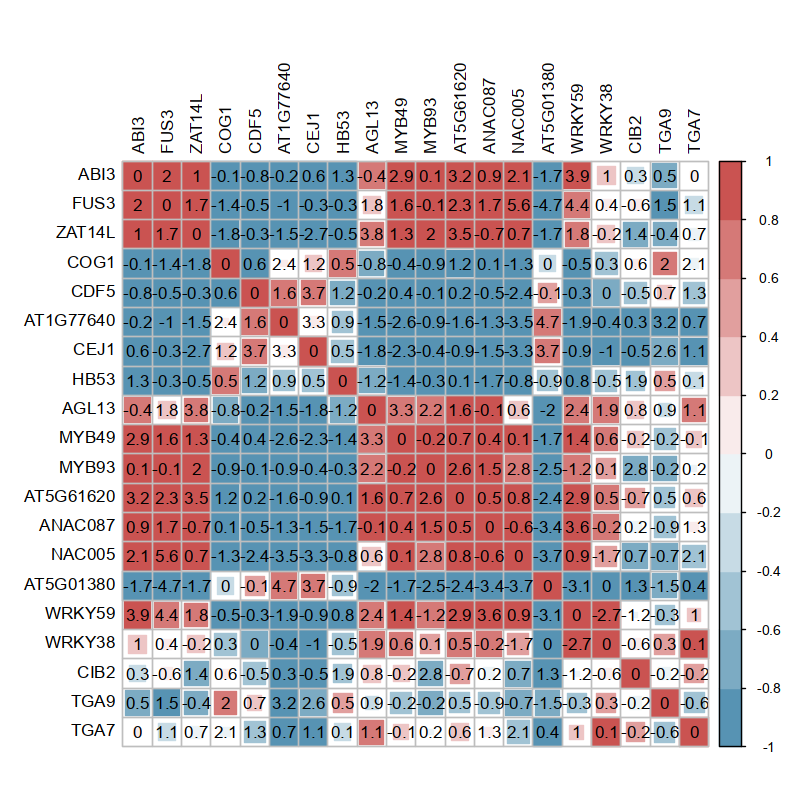

In [28]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

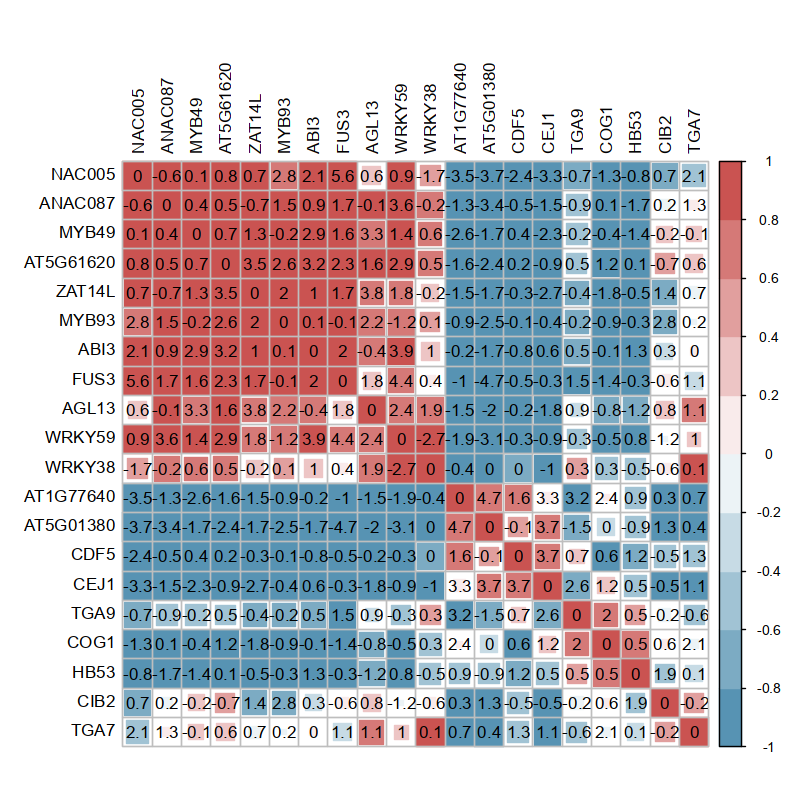

In [29]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'hclust', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

In [30]:
# Start capturing the plot output to a file
pdf("corrplot.pdf", width=8, height=8)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

png 
  2

In [31]:
allMotifs <- read.csv('/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.allMotifs.tsv', sep = '\t') 

In [32]:
allMotifs %>% head

,permutation,TF,chr,MSS,MES,TFBSID,strand,peakID,l2FC,limma_avgExpr,limma_B,limma_t_stat,DESeq_ldcSE,DESeq_stat,DESeq_baseMean,pval,pval_adj
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
1,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10020377,10020587,chr1:10020377-10020587,-,chr1:10020021-10020531,-0.0440,6.96,-6.810,-0.369,NA,NA,NA,7.17e-01,0.784000
2,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10025609,10025819,chr1:10025609-10025819,-,chr1:10025659-10026539,0.1890,6.94,-5.230,1.860,NA,NA,NA,8.04e-02,0.146000
3,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10033654,10033864,chr1:10033654-10033864,-,chr1:10033450-10034376,0.0562,7.50,-6.750,0.499,NA,NA,NA,6.24e-01,0.708000
4,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10050187,10050397,chr1:10050187-10050397,-,chr1:10050202-10050394,-0.9760,7.42,0.194,-4.590,NA,NA,NA,2.85e-04,0.001900
5,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10053681,10053891,chr1:10053681-10053891,-,chr1:10052827-10054516,-0.6230,8.31,3.620,-6.320,NA,NA,NA,9.28e-06,0.000181
6,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,AT1G01060,chr1,10055813,10056023,chr1:10055813-10056023,-,chr1:10055379-10055976,-1.0300,7.58,2.380,-5.670,NA,NA,NA,3.19e-05,0.000401


In [33]:
allMotifs %>% filter(l2FC > 2) %>% nrow

[1] 0

In [34]:
allMotifs %>% filter(l2FC < -2) %>% nrow

[1] 370

In [35]:
allMotifs %>% filter(l2FC > 1) %>% nrow

[1] 7883

##### l2FC here is the motif opening, DM vs WT

In [36]:
library(ChIPseeker)
library(TxDb.Athaliana.BioMart.plantsmart51)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  inner_join.phylo    tidytree
  inner_join.treedata tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

ChIPseeker v1.36.0

If you use ChIPseeker in publis

In [37]:
library(dplyr)
library(GenomicRanges)

# Assuming your data frame is named allMotifs
# Extract and transform the necessary columns
allMotifs_transformed <- allMotifs %>%
  mutate(
    chr = gsub("chr", "", chr), # Remove 'chr' from chromosome column
    start = as.numeric(gsub(".*:(\\d+)-\\d+", "\\1", peakID)), # Extract start position
    end = as.numeric(gsub(".*:\\d+-(\\d+)", "\\1", peakID)) # Extract end position
  )

# Create a GRanges object
granges_obj <- GRanges(
  seqnames = Rle(allMotifs_transformed$chr),
  ranges = IRanges(start = allMotifs_transformed$start, end = allMotifs_transformed$end),
  strand = Rle(strand(allMotifs_transformed$strand))    
)

# Add TF as metadata
mcols(granges_obj)$TF <- allMotifs_transformed$TF
mcols(granges_obj)$peakID <- allMotifs_transformed$peakID

granges_obj

GRanges object with 4977911 ranges and 2 metadata columns:
            seqnames            ranges strand |          TF
               <Rle>         <IRanges>  <Rle> | <character>
        [1]        1 10020021-10020531      - |   AT1G01060
        [2]        1 10025659-10026539      - |   AT1G01060
        [3]        1 10033450-10034376      - |   AT1G01060
        [4]        1 10050202-10050394      - |   AT1G01060
        [5]        1 10052827-10054516      - |   AT1G01060
        ...      ...               ...    ... .         ...
  [4977907]        5   9940599-9941159      + |   AT5G67580
  [4977908]        5     996550-997478      - |   AT5G67580
  [4977909]        5   9968914-9969679      + |   AT5G67580
  [4977910]        5   9974520-9975810      - |   AT5G67580
  [4977911]        5     997676-998485      - |   AT5G67580
                            peakID
                       <character>
        [1] chr1:10020021-10020531
        [2] chr1:10025659-10026539
        [3] chr1:1003

In [38]:
# Annotate peaks
txdb <- TxDb.Athaliana.BioMart.plantsmart51
annotated_peaks <- annotatePeak(granges_obj, TxDb = txdb, level = "gene")

>> preparing features information...		 2024-01-26 17:14:11 
>> identifying nearest features...		 2024-01-26 17:14:11 
>> calculating distance from peak to TSS...	 2024-01-26 17:14:55 
>> assigning genomic annotation...		 2024-01-26 17:14:55 
>> assigning chromosome lengths			 2024-01-26 17:15:21 
>> done...					 2024-01-26 17:15:21 


In [39]:
TF_peak_annotated <- as_tibble(annotated_peaks@anno) %>% filter( distanceToTSS %>% abs() < 20000 )
TF_peak_annotated

seqnames,start,end,width,strand,TF,peakID,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS
<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,10020021,10020531,511,-,AT1G01060,chr1:10020021-10020531,Promoter (1-2kb),1,10018691,10020479,1789,1,AT1G28500,1840
1,10025659,10026539,881,-,AT1G01060,chr1:10025659-10026539,Promoter (2-3kb),1,10023817,10026311,2495,1,AT1G28510,2722
1,10033450,10034376,927,-,AT1G01060,chr1:10033450-10034376,Promoter (2-3kb),1,10035617,10037403,1787,1,AT1G28540,-2167
1,10050202,10050394,193,-,AT1G01060,chr1:10050202-10050394,Promoter (1-2kb),1,10047276,10049343,2068,2,AT1G28590,-1051
1,10052827,10054516,1690,-,AT1G01060,chr1:10052827-10054516,Promoter (<=1kb),1,10050957,10053218,2262,2,AT1G28600,0
1,10055379,10055976,598,-,AT1G01060,chr1:10055379-10055976,Promoter (<=1kb),1,10053443,10055881,2439,2,AT1G28610,0
1,1006358,1006626,269,-,AT1G01060,chr1:1006358-1006626,Promoter (1-2kb),1,1004688,1008370,3683,1,AT1G03930,1938
1,10074221,10075193,973,-,AT1G01060,chr1:10074221-10075193,Promoter (1-2kb),1,10071609,10073549,1941,2,AT1G28660,-1644
1,10110573,10111709,1137,-,AT1G01060,chr1:10110573-10111709,Promoter (1-2kb),1,10109500,10111738,2239,2,AT1G28960,1165


In [40]:
proportion_l2FC_per_TF <- allMotifs %>%
    filter(pval_adj < 0.05) %>% 
  group_by(TF) %>% 
  summarise(
    positive_peak = sum(l2FC > 0, na.rm = TRUE),
    negative_peak = sum(l2FC < 0, na.rm = TRUE),
    total_peak = n(),
    proportion_positive = positive_peak / total_peak,
    proportion_negative = negative_peak / total_peak
  )

In [41]:
proportion_l2FC_per_TF %>% filter(TF == 'AT5G01900')

TF,positive_peak,negative_peak,total_peak,proportion_positive,proportion_negative
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
AT5G01900,1114,1558,2672,0.4169162,0.5830838


In [42]:
connectivity_table_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [43]:
connectivity_table <- connectivity_table_info %>% dplyr::select(gene, connectivity_rowSums_adj, module, gene_name)

In [44]:
TF_peak_annotated_in_WGCNA <- TF_peak_annotated %>% left_join(connectivity_table, by = c('geneId' = 'gene')) %>% filter( !is.na(module) ) 

In [45]:
##peakID is contain the TFBS, which belong to geneID, geneID is in module
TF_peak_annotated_in_WGCNA <- TF_peak_annotated_in_WGCNA %>% dplyr::select(TF, peakID, geneId, connectivity_rowSums_adj, module  ) %>% left_join(allMotifs, by = c('TF' = 'TF','peakID' = 'peakID')) 

In [46]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup()

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [47]:
connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes' = 'n')

module,number_of_genes
<chr>,<int>
MEblue,2222
MEcyan,2490
MEdarkgreen,84
MEdarkred,93
MEdarkturquoise,33
MEgreenyellow,93
MEmidnightblue,58
MEpurple,234
MEsalmon,63


In [48]:
TF_peak_annotated_in_WGCNA

TF,peakID,geneId,connectivity_rowSums_adj,module,permutation,chr,MSS,MES,TFBSID,strand,l2FC,limma_avgExpr,limma_B,limma_t_stat,DESeq_ldcSE,DESeq_stat,DESeq_baseMean,pval,pval_adj
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
AT1G01060,chr1:10055379-10055976,AT1G28610,1320.3847,MEblue,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10055813,10056023,chr1:10055813-10056023,-,-1.0300,7.58,2.380,-5.6700,NA,NA,NA,3.19e-05,4.01e-04
AT1G01060,chr1:10138765-10139234,AT1G29050,1596.3479,MEcyan,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10138996,10139206,chr1:10138996-10139206,-,0.0883,7.29,-6.530,0.8290,NA,NA,NA,4.19e-01,5.24e-01
AT1G01060,chr1:10149296-10150003,AT1G29070,1337.0334,MEblue,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10149544,10149754,chr1:10149544-10149754,+,-0.5380,9.45,0.779,-4.8800,NA,NA,NA,1.58e-04,1.24e-03
AT1G01060,chr1:10190574-10193109,AT1G29170,164.3499,MEpurple,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10191526,10191736,chr1:10191526-10191736,-,0.1580,7.34,-6.170,1.1900,NA,NA,NA,2.52e-01,3.58e-01
AT1G01060,chr1:10233016-10233716,AT1G29280,1547.0193,MEcyan,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10233565,10233775,chr1:10233565-10233775,+,0.4690,7.05,-3.180,2.9700,NA,NA,NA,8.79e-03,2.61e-02
AT1G01060,chr1:10235932-10237557,AT1G29280,1547.0193,MEcyan,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10237374,10237584,chr1:10237374-10237584,+,-0.1490,7.53,-6.130,-1.2200,NA,NA,NA,2.40e-01,3.43e-01
AT1G01060,chr1:10246021-10246453,AT1G29290,1780.8018,MEcyan,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10246094,10246304,chr1:10246094-10246304,+,0.2630,7.79,-4.630,2.2200,NA,NA,NA,4.13e-02,8.71e-02
AT1G01060,chr1:10287567-10288419,AT1G29390,1707.2875,MEblue,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10288036,10288246,chr1:10288036-10288246,-,-0.7750,8.62,2.010,-5.4800,NA,NA,NA,4.63e-05,5.16e-04
AT1G01060,chr1:10294544-10294945,AT1G29400,1806.3493,MEcyan,../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0,chr1,10294483,10294693,chr1:10294483-10294693,-,-0.7680,7.39,-2.630,-3.2400,NA,NA,NA,4.97e-03,1.66e-02


In [49]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup() %>% left_join(
          connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes_in_module' = 'n'), by = 'module') %>% mutate(
      avg_peak_per_gene_in_module = total_peak / number_of_genes_in_module)

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [50]:
TF_peak_annotated_in_WGCNA_meidan_l2FC%>% filter(TF == 'AT5G01900')

TF,module,median_l2FC,positive_peak,negative_peak,total_peak,proportion_positive,proportion_negative,number_of_genes_in_module,avg_peak_per_gene_in_module
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
AT5G01900,MEblue,-0.6145,37,243,280,0.1321429,0.8678571,2222,0.12601260
AT5G01900,MEcyan,0.3335,204,156,360,0.5666667,0.4333333,2490,0.14457831
AT5G01900,MEdarkgreen,-0.4660,1,7,8,0.1250000,0.8750000,84,0.09523810
AT5G01900,MEdarkred,-0.5695,2,8,10,0.2000000,0.8000000,93,0.10752688
AT5G01900,MEgreenyellow,-0.4680,2,9,11,0.1818182,0.8181818,93,0.11827957
AT5G01900,MEmidnightblue,-0.3620,2,4,6,0.3333333,0.6666667,58,0.10344828
AT5G01900,MEpurple,-0.7730,2,19,21,0.0952381,0.9047619,234,0.08974359
AT5G01900,MEsalmon,0.3115,12,6,18,0.6666667,0.3333333,63,0.28571429
AT5G01900,MEtan,-0.6660,2,6,8,0.2500000,0.7500000,84,0.09523810


In [59]:
diffTF_AME_WGCNA_modules_L2fold

TF,TF_class,weighted_meanDifference,pvalueAdj,motif_alt_ID,consensus,adj_p-value,enriched_module,gene_name,TFBS,Family,log2FoldChange_DM1_2d_vs_Col_14
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.06e-34,MEblue,AT1G01250,437,ERF,-2.257223
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,1.09e-20,MEcyan,AT1G01250,327,ERF,-2.257223
AT1G01250,undetermined,-0.0274,0.01256585,MP00120,DNHDKTGTCGGTGRH,9.89e-08,MEpurple,AT1G01250,44,ERF,-2.257223
AT1G02230,activator,0.0812,0.01256585,MP00122,CTTVTTYHRYAAGT,3.37e-08,MEcyan,NAC004,241,NAC,5.802775
AT1G02250,activator,0.0781,0.01256585,MP00123,TWRCTTVTTYHAYAAGTTW,3.85e-09,MEcyan,NAC005,273,NAC,6.236384
AT1G02250,activator,0.0781,0.01256585,MP00123,TWRCTTVTTYHAYAAGTTW,1.69e-04,MEblue,NAC005,64,NAC,6.236384
AT1G08320,activator,0.0185,0.01256585,MP00131,GMTGACGTCAY,5.34e-06,MEcyan,TGA9,170,bZIP,5.438124
AT1G08320,activator,0.0185,0.01256585,MP00131,GMTGACGTCAY,1.55e-04,MEtan,TGA9,12,bZIP,5.438124
AT1G12260,repressor,0.0682,0.01256585,MP00136,CKTRAAWHWYAMGCA,5.78e-08,MEcyan,NAC007,414,NAC,-3.704851


In [51]:
##remove 

cutoff_l2f = 2

# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>%
dplyr::filter( TF_class %>% str_detect('activator|repressor')) %>%
dplyr::select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
dplyr::select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct %>% mutate(TF_class = as.character(TF_class), TF_class = 
                        ifelse(is.na(TF_class), subgroup, TF_class))

nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>%
    filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>% 
    dplyr::select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 

##add median_l2FC for each TF in each module
edges <- edges %>% left_join(TF_peak_annotated_in_WGCNA_meidan_l2FC %>% 
        dplyr::select(TF, module, median_l2FC) %>% ungroup,    by = c('source' = 'TF', 'target' = 'module')) %>%
    filter( source %in% nodes$ID)

edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE)
edges %>% sample_n(2)


[1] 73

ID,gene_name,TF_class,Family,pvalueAdj,consensus,log2FoldChange_DM1_2d_vs_Col_14,group,subgroup
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
MEdarkgreen,MEdarkgreen,MEdarkgreen,module,NA,NA,NA,module,MEdarkgreen
AT1G32870,NAC13,activator,NAC,0.01256585,CTTGNNRARCAAGNAA,2.204415,TF,NAC


source,target,interaction,weight,median_l2FC
<chr>,<chr>,<fct>,<int>,<dbl>
AT1G79180,MEcyan,activator,492,-0.3230
AT2G45420,MEdarkgreen,repressor,10,-0.4725


In [52]:
edges$median_l2FC %>% max
edges$median_l2FC %>% min

[1] 0.5865

[1] -0.936

In [53]:
diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' ))  %>% 
    filter(log2FoldChange < -3) %>%
    dplyr::rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)

TF,TF_class,weighted_meanDifference,pvalueAdj,motif_alt_ID,consensus,adj_p-value,enriched_module,gene_name,TFBS,Family,log2FoldChange_DM1_2d_vs_Col_14
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
AT1G12260,repressor,0.0682,0.01256585,MP00136,CKTRAAWHWYAMGCA,5.78e-08,MEcyan,NAC007,414,NAC,-3.704851
AT1G12260,repressor,0.0682,0.01256585,MP00136,CKTRAAWHWYAMGCA,5.26e-05,MEblue,NAC007,274,NAC,-3.704851
AT1G19040,undetermined,0.0727,0.01256585,MP00150,WWACTTGVRGHNCAAG,5.65e-20,MEcyan,AT1G19040,266,NAC,-4.799020
AT1G19040,undetermined,0.0727,0.01256585,MP00150,WWACTTGVRGHNCAAG,6.33e-09,MEblue,AT1G19040,187,NAC,-4.799020
AT1G19040,undetermined,0.0727,0.01256585,MP00150,WWACTTGVRGHNCAAG,1.37e-02,MEmidnightblue,AT1G19040,9,NAC,-4.799020
AT1G24260,undetermined,-0.0295,0.01256585,MP00605,CCAAAAAWGGAAA,5.66e-14,MEblue,SEP3,675,MIKC_MADS,-4.796993
AT1G24260,undetermined,-0.0295,0.01256585,MP00605,CCAAAAAWGGAAA,3.07e-09,MEcyan,SEP3,653,MIKC_MADS,-4.796993
AT1G24260,undetermined,-0.0295,0.01256585,MP00605,CCAAAAAWGGAAA,1.94e-04,MEpurple,SEP3,26,MIKC_MADS,-4.796993
AT1G24260,undetermined,-0.0295,0.01256585,MP00605,CCAAAAAWGGAAA,1.27e-02,MEdarkred,SEP3,38,MIKC_MADS,-4.796993


In [54]:
nodes_l2fc_2 <- nodes %>% filter(ID %>% str_detect('^AT')) %>% filter(log2FoldChange_DM1_2d_vs_Col_14 > 2) 

In [55]:
Cor_test <- Cor_matrix_all[nodes_l2fc_2$ID, nodes_l2fc_2$ID]
Syn_test <- Synergy_matrix_all[nodes_l2fc_2$ID, nodes_l2fc_2$ID]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

In [56]:
# Start capturing the plot output to a file
pdf("./plots/corrplot_nodes_l2fc_2.pdf", width=8, height=8)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

png 
  2

In [57]:
# Start capturing the plot output to a file
pdf("./plots/corrplot_nodes_l2fc_2.pdf", width=14, height=14)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

png 
  2